In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = {
    'Population_growth_%': [1.2, 1.8, 2.0, 2.5, 2.8, 3.0, 3.2, 3.4, 3.6, 4.0],
    'Urban_area_sqkm': [50, 60, 72, 85, 100, 120, 140, 165, 190, 210],
    'Industrial_units': [120, 135, 150, 170, 185, 200, 225, 250, 270, 300],
    'Forest_loss_ha': [100, 130, 160, 190, 230, 270, 310, 350, 400, 460]
}
df = pd.DataFrame(data)

X = df[['Population_growth_%', 'Urban_area_sqkm', 'Industrial_units']]
y = df['Forest_loss_ha']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = ElasticNet(alpha=0.3, l1_ratio=0.5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature:22s}: {coef:.4f}")

Mean Squared Error: 13.233
R² Score: 0.999

Feature Coefficients:
Population_growth_%   : 2.4333
Urban_area_sqkm       : 0.8776
Industrial_units      : 1.1559


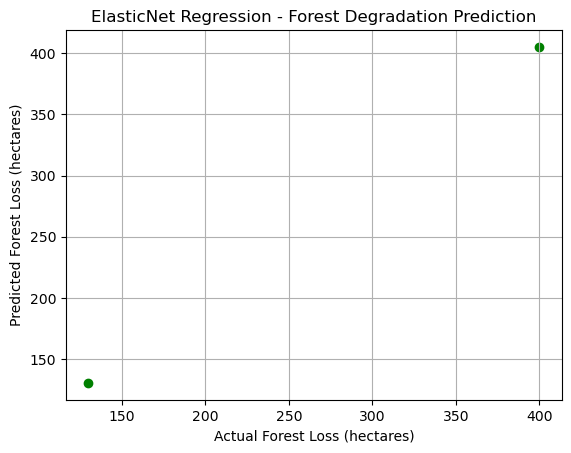

In [8]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Forest Loss (hectares)")
plt.ylabel("Predicted Forest Loss (hectares)")
plt.title("ElasticNet Regression - Forest Degradation Prediction")
plt.grid(True)
plt.show()